In [1]:
# CÉLULA 1: INSTALAÇÃO E IMPORTAÇÃO
# Garante a instalação da biblioteca python-control e importação de dependências.

print("Iniciando instalação da biblioteca de controle...")
!pip install control
!pip install numpy scipy matplotlib

import control.matlab as ctrl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md
import warnings

# Suprime o aviso de uso do control.matlab
warnings.filterwarnings("ignore", category=UserWarning)
print("Configurações concluídas. Prossiga para as células seguintes.")

Iniciando instalação da biblioteca de controle...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 13.3 MB/s eta 0:00:00
Configurações concluídas. Prossiga para as células seguintes.


<>:5: SyntaxWarning: invalid escape sequence '\z'
<>:35: SyntaxWarning: invalid escape sequence '\%'
<>:36: SyntaxWarning: invalid escape sequence '\%'
<>:39: SyntaxWarning: invalid escape sequence '\z'
<>:78: SyntaxWarning: invalid escape sequence '\o'
<>:79: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\z'
<>:35: SyntaxWarning: invalid escape sequence '\%'
<>:36: SyntaxWarning: invalid escape sequence '\%'
<>:39: SyntaxWarning: invalid escape sequence '\z'
<>:78: SyntaxWarning: invalid escape sequence '\o'
<>:79: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-372497993.py:5: SyntaxWarning: invalid escape sequence '\z'
  md("### Módulo 5.3: Análise da Resposta Transitória e Compromisso $\zeta$ vs. $M.U.P.$")
/tmp/ipython-input-372497993.py:35: SyntaxWarning: invalid escape sequence '\%'
  plt.plot(T_out, y1, label=f'$\\zeta={zeta_1}$ (M.U.P. $\\approx 4.3\%$ )')
/tmp/ipython-input-372497993.py:36: SyntaxWarning: invalid esca

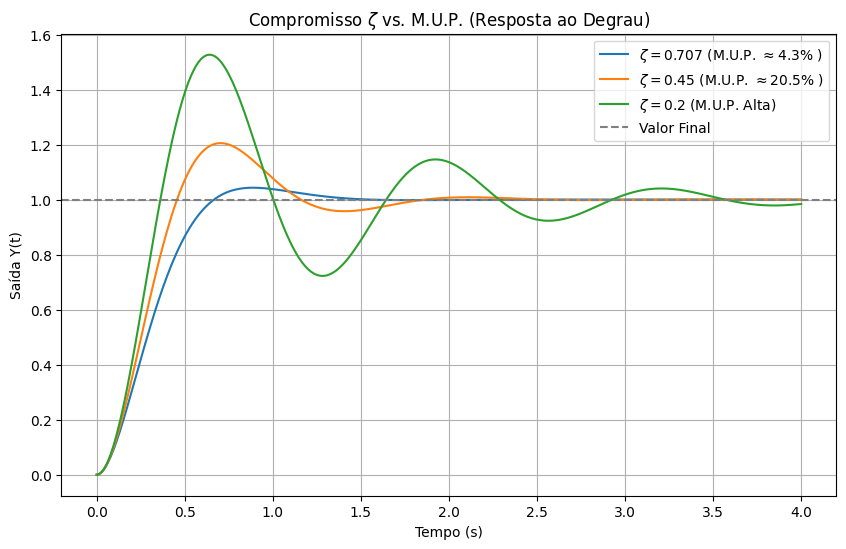

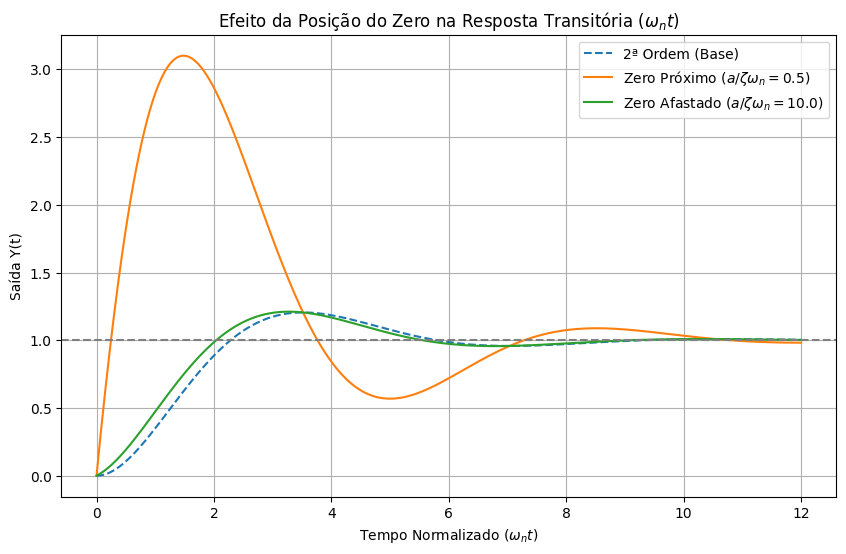

A simulação demonstra que um **Zero Próximo** ($a/\zeta\omega_n = 0.5$) ao par de polos dominantes aumenta drasticamente a M.U.P. (Mais que 20.5% base), anulando a aproximação de 2ª ordem. Um **Zero Afastado** ($a/\zeta\omega_n = 10.0$) tem efeito insignificante, e a resposta se assemelha ao sistema de 2ª ordem.

In [2]:
# CÉLULA 2: Resposta Transitória, M.U.P. e Polos Dominantes

# --- Configurações e Parâmetros (Módulo 5.3) ---

md("### Módulo 5.3: Análise da Resposta Transitória e Compromisso $\zeta$ vs. $M.U.P.$")

# Parâmetros de Amortecimento (Zeta - ζ)
# Valores escolhidos para mostrar o compromisso (0.707 = M.U.P. baixa; 0.2 = M.U.P. alta)
zeta_1 = 0.707 # Baixa M.U.P. (aprox. 4.3%)
zeta_2 = 0.45  # M.U.P. Média (aprox. 20.5%)
zeta_3 = 0.2   # M.U.P. Alta
omega_n = 5.0  # Frequência natural constante

# Função de Transferência de Segunda Ordem (FT) T(s) = omega_n^2 / (s^2 + 2*zeta*omega_n*s + omega_n^2)
def create_second_order_system(zeta, omega_n):
    num = [omega_n**2]
    den = [1, 2 * zeta * omega_n, omega_n**2]
    return ctrl.tf(num, den)

T1 = create_second_order_system(zeta_1, omega_n)
T2 = create_second_order_system(zeta_2, omega_n)
T3 = create_second_order_system(zeta_3, omega_n)

# Tempo de simulação (para acomodação de ζ=0.2)
T_end = 4 * (1 / (zeta_3 * omega_n))
T_sim = np.linspace(0, T_end, 500)

# Simulação da Resposta ao Degrau
y1, T_out = ctrl.step(T1, T_sim)
y2, _ = ctrl.step(T2, T_sim)
y3, _ = ctrl.step(T3, T_sim)

# Plotagem do Compromisso
plt.figure(figsize=(10, 6))
plt.plot(T_out, y1, label=f'$\\zeta={zeta_1}$ (M.U.P. $\\approx 4.3\%$ )')
plt.plot(T_out, y2, label=f'$\\zeta={zeta_2}$ (M.U.P. $\\approx 20.5\%$ )')
plt.plot(T_out, y3, label=f'$\\zeta={zeta_3}$ (M.U.P. Alta)')
plt.axhline(1.0, color='gray', linestyle='--', label='Valor Final')
plt.title('Compromisso $\zeta$ vs. M.U.P. (Resposta ao Degrau)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída Y(t)')
plt.legend()
plt.grid(True)
plt.show()

# --- Simulação de Polos Dominantes e Zeros (Módulo 5.4) ---

md("### Módulo 5.4: Efeito de Polos e Zeros Adicionais")

# Polos Dominantes (ζ=0.45, ωn=1.0)
zeta_dom = 0.45
omega_n_dom = 1.0
T_dom = create_second_order_system(zeta_dom, omega_n_dom)

# Sistema com Zero Adicional (T(s) = (omega_n^2/a) * (s+a) / (s^2 + 2*zeta*omega_n*s + omega_n^2))
# O zero é adicionado em s = -a. A razão de interesse é a/(zeta*omega_n).

# 1. Zero Próximo (Razão = 0.5): Aumenta M.U.P.
a1 = 0.5 * zeta_dom * omega_n_dom
T_zero_proximo = create_second_order_system(zeta_dom, omega_n_dom) * ctrl.tf([1/a1, 1], [1/a1]) * ctrl.tf([omega_n_dom**2/a1], [1])

# 2. Zero Afastado (Razão = 10.0): M.U.P. se aproxima do sistema de 2ª ordem
a2 = 10.0 * zeta_dom * omega_n_dom
T_zero_afastado = create_second_order_system(zeta_dom, omega_n_dom) * ctrl.tf([1/a2, 1], [1/a2]) * ctrl.tf([omega_n_dom**2/a2], [1])

# Simulação (Tempo normalizado ωn*t)
T_sim_norm = np.linspace(0, 12, 500)
y_dom, T_out_norm = ctrl.step(T_dom, T_sim_norm)
y_zero_prox, _ = ctrl.step(T_zero_proximo, T_sim_norm)
y_zero_afas, _ = ctrl.step(T_zero_afastado, T_sim_norm)

# Plotagem dos Efeitos
plt.figure(figsize=(10, 6))
plt.plot(T_out_norm, y_dom, '--', label='2ª Ordem (Base)')
plt.plot(T_out_norm, y_zero_prox, label=f'Zero Próximo ($a/\\zeta\\omega_n = 0.5$)')
plt.plot(T_out_norm, y_zero_afas, label=f'Zero Afastado ($a/\\zeta\\omega_n = 10.0$)')
plt.axhline(1.0, color='gray', linestyle='--')
plt.title('Efeito da Posição do Zero na Resposta Transitória ($\omega_n t$)')
plt.xlabel('Tempo Normalizado ($\omega_n t$)')
plt.ylabel('Saída Y(t)')
plt.legend()
plt.grid(True)
plt.show()

md("##### Discussão: Efeito dos Polos e Zeros (Módulo 5.4)")
md("A simulação demonstra que um **Zero Próximo** ($a/\\zeta\\omega_n = 0.5$) ao par de polos dominantes aumenta drasticamente a M.U.P. (Mais que 20.5% base), anulando a aproximação de 2ª ordem. Um **Zero Afastado** ($a/\\zeta\\omega_n = 10.0$) tem efeito insignificante, e a resposta se assemelha ao sistema de 2ª ordem.")